# Import dependencies

In [1]:
import os, sys, pandas as pd, matplotlib.pyplot as plt
from stumpy import config

# Import library with current code functions
sys.path.append(os.path.join("..", "lib"))
import manual_labeler_functions as man_lab_fun, automatic_labeler_functions as aut_lab_fun, general_functions as gf, files_paths as fp

In [2]:
config.STUMPY_EXCL_ZONE_DENOM = 1 
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

## Getting the list of measure files to be labeled and the list of seed available

In [3]:
FILE_LIST_VD_MEASURE = gf.find_files_in_all_subdirectories([fp.DATASET_YT, fp.DATASET_LOCAL], fp.VD_MEASURE_L0)
FILE_LIST_SEED = gf.find_files_in_all_subdirectories([fp.DATASET_SEED], fp.VD_LABELED_L0)

In [4]:
FILE_LIST_SEED

['../Dataset/REF-Gold-Label/VD_R_0000000001/VD_LABELED_L0.CSV',
 '../Dataset/REF-Gold-Label/VD_R_0000000003/VD_LABELED_L0.CSV']

## Select reference SEED

In [5]:
path_file = FILE_LIST_SEED[0]

In [6]:
path_dir = os.path.dirname(path_file)
vd_labeled_path = os.path.join(path_dir, fp.VD_LABELED_L0)
vd_labeled = pd.read_csv(vd_labeled_path)
vd_labeled.drop(columns=['Unnamed: 0'], inplace=True)

## Select the measures in the interval

In [7]:
all_class = man_lab_fun.GET_ALL_CLASSES(vd_labeled)
label_name = all_class[1]

reference_measures = man_lab_fun.GET_MEASURES_FROM_CLASS(vd_labeled, label_name)

frames = man_lab_fun.GET_FRAMES_FROM_CLASS(vd_labeled, label_name)

all_measures_in_frame_interval = vd_labeled.loc[frames[:28]]
selected_measures_in_frame_interval = all_measures_in_frame_interval[reference_measures]

## Plot query serie

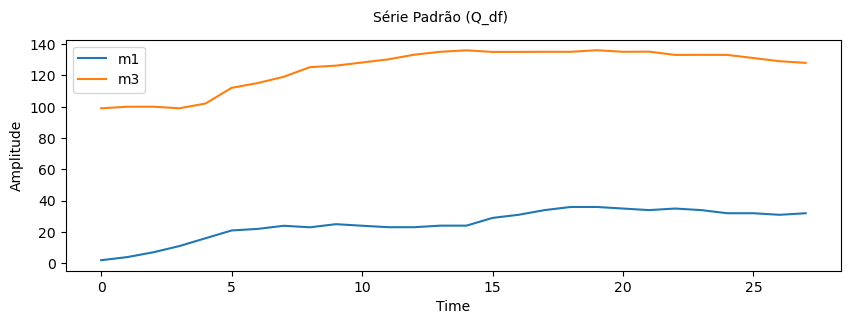

In [8]:
plt.subplots(figsize=(10, 3))
plt.suptitle('Série Padrão (Q_df)', fontsize='10')
plt.xlabel('Time', fontsize ='10')
plt.ylabel('Amplitude', fontsize='10')
plt.plot(selected_measures_in_frame_interval, label=selected_measures_in_frame_interval.columns)
plt.legend()
plt.show()

In [9]:
dict_label_parameters = {'label_name': label_name, 'reference_measures': reference_measures}

RESUME_DT = pd.DataFrame()
for i, current_path_location in enumerate(FILE_LIST_VD_MEASURE):
    print (str(i+1) + " of " + str(len(FILE_LIST_VD_MEASURE)) + ": " + current_path_location)

    RESUME_DT = aut_lab_fun.label_current_series(current_path_location, RESUME_DT, selected_measures_in_frame_interval, dict_label_parameters)

final_sum = RESUME_DT['final'].sum()
print(f'Total of saved Subseries == {final_sum}') 

1 of 22: ../Dataset/DD-Local/VD_D_0000000001/VD_MEASURE_L0.CSV
list_aux1 [24]
list_aux2 [28]
list_of_index [{24}]
VD_LABEL_PATH ../Dataset/DD-Local/VD_D_0000000001/VD_LABELED_L0.CSV
Reading Label File...
Saving VD_LABELED_L0...
2 of 22: ../Dataset/DD-Local/VD_D_0000000002/VD_MEASURE_L0.CSV
list_aux1 [1562 887 1041 453 46 207]
list_aux2 [1075 53 914 156 1623 521 1555 1345 83 463 850]
list_of_index [{1555, 453, 46}]
VD_LABEL_PATH ../Dataset/DD-Local/VD_D_0000000002/VD_LABELED_L0.CSV
Reading Label File...
Saving VD_LABELED_L0...
3 of 22: ../Dataset/DD-Local/VD_D_0000000003/VD_MEASURE_L0.CSV
list_aux1 [1230 263 929 321 480 1318 1424 1517 540 884 43 1724]
list_aux2 [925 1215 1471 1118 51 585 1281 1321 1632 1731 259]
list_of_index [{259, 1318, 43, 1724, 925}]
VD_LABEL_PATH ../Dataset/DD-Local/VD_D_0000000003/VD_LABELED_L0.CSV
Reading Label File...
Saving VD_LABELED_L0...
4 of 22: ../Dataset/DD-Local/VD_D_0000000004/VD_MEASURE_L0.CSV
list_aux1 [788 913 842 1099 1016 1193 503 1639 759 1134]
li